In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# TASK #1: PROJECT OVERVIEW

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM PRELIMINARY DATA PROCESSING

In [2]:
# Import the necessary packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import optimizers


In [3]:
# load the data
facialpoints_df = pd.read_csv('/content/drive/MyDrive/CS406/KeyFacialPoints.csv')

In [4]:
facialpoints_df

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             66.033564          39.002274           30.227008   
1             64.332936          34.970077           29.949277   
2             65.057053          34.909642           30.903789   
3             65.225739          37.261774           32.023096   
4             66.725301          39.621261           32.244810   
...                 ...                ...                 ...   
2135          67.180378          35.816373           33.239956   
2136          65.724490          36.301020           25.377551   
2137          68.430866          38.651975           28.895857   
2138          64.152180          30.691592           27.000898   
2139          66.683755          34.483429           30.784490   

      right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0              36.421678                59.582075                39.647423   
1              33.448715                58.856170                35.274349   
2              34.909642                59.412000                36.320968   
3              37.261774                60.003339                39.127179   
4              38.042032                58.565890                39.621261   
...                  ...                      ...                      ...   
2135           34.921932                59.347973                37.000904   
2136           37.311224                58.530612                37.739796   
2137           37.617027                61.659350                40.100902   
2138           40.868082                56.505624                34.126963   
2139           38.578939                59.255347                36.065143   

      left_eye_outer_corner_x  left_eye_outer_corner_y  \
0                   73.130346                39.969997   
1                   70.722723                36.187166   
2                   70.984421                36.320968   
3                   72.314713                38.380967   
4                   72.515926                39.884466   
...                       ...                      ...   
2135                72.667896                37.097600   
2136                74.448980                37.525510   
2137                75.586792                40.219182   
2138                73.436776                28.556335   
2139                73.942694                34.624653   

      right_eye_inner_corner_x  right_eye_inner_corner_y  ...  nose_tip_y  \
0                    36.356571                 37.389402  ...   57.066803   
1                    36.034723                 34.361532  ...   55.660936   
2                    37.678105                 36.320968  ...   53.538947   
3                    37.618643                 38.754115  ...   54.166539   
4                    36.982380                 39.094852  ...   64.889521   
...                        ...                       ...  ...         ...   
2135                 39.404349                 36.589944  ...   60.065396   
2136                 33.551020                 38.107143  ...   62.472789   
2137                 37.665118                 39.087245  ...   63.289576   
2138                 34.746122                 40.506939  ...   59.735799   
2139                 37.478531                 39.398041  ...   59.269388   

      mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
0               61.195308            79.970165             28.614496   
1               56.421447            76.352000             35.122383   
2               60.822947            73.014316             33.726316   
3               65.598887            72.703722             37.245496   
4               60.671411            77.523239             31.191755   
...                   ...                  ...                   ...   
2135            64.397610            73.248393             35.446431   
2136            66.928121            79.229046             28.015377   
2137  

In [5]:
facialpoints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [6]:
# Let's take a look at a sample image
facialpoints_df['Image'][1]

'219 215 204 196 204 211 212 200 180 168 178 196 194 196 203 209 199 192 197 201 207 215 199 190 182 180 183 190 190 176 175 175 170 158 162 170 150 133 133 128 121 115 115 114 112 114 113 112 120 127 123 118 112 109 112 110 107 106 104 104 100 98 105 122 135 143 152 135 114 104 81 74 87 107 98 82 84 79 70 69 62 62 79 94 97 100 98 93 100 100 97 96 93 92 88 84 222 219 220 211 207 199 185 178 171 175 196 199 199 200 201 205 202 200 204 206 211 219 204 192 188 185 185 193 189 180 177 178 173 158 159 162 145 133 133 129 122 118 116 115 114 115 115 118 127 132 127 120 116 119 118 114 114 113 110 108 105 104 110 130 140 149 152 128 106 106 91 78 90 107 101 84 90 93 79 75 73 59 58 74 94 102 100 99 97 90 94 96 95 92 88 86 231 224 212 197 191 186 176 170 172 190 201 199 200 203 204 210 215 211 210 213 213 217 210 192 188 188 189 194 189 183 181 183 175 158 158 158 142 132 133 131 125 120 121 120 116 115 116 122 135 137 129 122 121 125 121 119 120 118 117 112 112 109 116 136 149 156 149 126 109 

In [7]:
# Since values for the image is given as space separated string, we will need to separate the values using ' ' as separator.
# Then convert this into numpy array using np.fromstring and convert the obtained 1D array into 2D array of shape (96,96)
facialpoints_df['Image'] = facialpoints_df['Image'].apply(lambda x: np.fromstring(x, dtype= int, sep = ' ').reshape(96,96))

In [8]:
# Let's obtain the shape of the resized image
facialpoints_df['Image'][1].shape

(96, 96)

In [9]:
# Let's confirm that there are no null values
facialpoints_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [10]:
#Mini task:
#Hãy tìm min, max, average cho các thuộc tính trên
facialpoints_df.describe()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
count        2140.000000        2140.000000         2140.000000   
mean           66.221549          36.842274           29.640269   
std             2.087683           2.294027            2.051575   
min            47.835757          23.832996           18.922611   
25%            65.046300          35.468842           28.472224   
50%            66.129065          36.913319           29.655440   
75%            67.332093          38.286438           30.858673   
max            78.013082          46.132421           42.495172   

       right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
count         2140.000000              2140.000000              2140.000000   
mean            37.063815                59.272128                37.856014   
std              2.234334                 2.005631                 2.034500   
min             24.773072                41.779381                27.190098   
25%             35.818377                58.113054                36.607950   
50%             37.048085                59.327154                37.845220   
75%             38.333884                60.521492                39.195431   
max             45.980981                69.023030                47.190316   

       left_eye_outer_corner_x  left_eye_outer_corner_y  \
count              2140.000000              2140.000000   
mean                 73.412473                37.640110   
std                   2.701639                 2.684162   
min                  52.947144                26.250023   
25%                  71.741978                36.102409   
50%                  73.240045                37.624207   
75%                  74.978684                39.308331   
max                  87.032252                49.653825   

       right_eye_inner_corner_x  right_eye_inner_corner_y  ...   nose_tip_x  \
count               2140.000000               2140.000000  ...  2140.000000   
mean                  36.603107                 37.920852  ...    47.952141   
std                    1.822784                  2.009505  ...     3.276053   
min                   24.112624                 26.250023  ...    24.472590   
25%                   35.495730                 36.766783  ...    46.495330   
50%                   36.620735                 37.920336  ...    47.900511   
75%                   37.665280                 39.143921  ...    49.260657   
max                   47.293746                 44.887301  ...    65.279654   

        nose_tip_y  mouth_left_corner_x  mouth_left_corner_y  \
count  2140.000000          2140.000000          2140.000000   
mean     57.253926            63.419076            75.887660   
std       4.528635             3.650131             4.438565   
min      41.558400            43.869480            57.023258   
25%      54.466000            61.341291            72.874263   
50%      57.638582            63.199057            75.682465   
75%      60.303524            65.302398            78.774969   
max      75.992731            84.767123            94.673637   

       mouth_right_corner_x  mouth_right_corner_y  mouth_center_top_lip_x  \
count           2140.000000           2140.000000             2140.000000   
mean              32.967365             76.134065               48.081325   
std                3.595103              4.259514                2.723274   
min                9.778137             56.690208               32.260312   
25%               30.879288             73.280038               46.580004   
50%               33.034022             75.941985               47.939031   
75%               35.063575             78.884031               49.290000   
max               50.973348             93.443176               61.804506   

       mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
count             2140.000000                2140.000000   
mean                72.681125                  48.149654

# TASK #3: PERFORM IMAGE VISUALIZATION

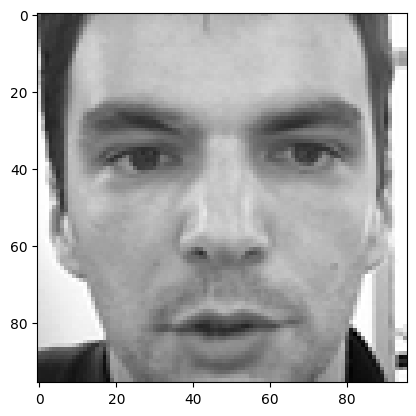

In [11]:
# Plot a random image from the dataset along with facial keypoints.
i = np.random.randint(1, len(facialpoints_df))
plt.imshow(facialpoints_df['Image'][i],cmap='gray')


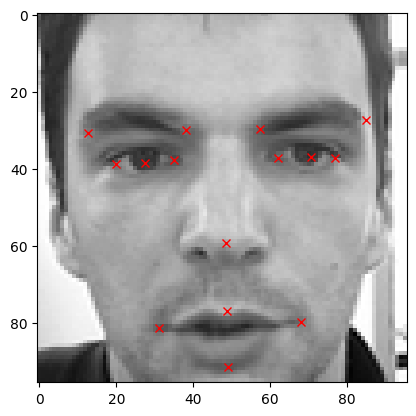

In [12]:
# The (x, y) coordinates for the 15 key features are plotted on top of the image
# Below is a for loop starting from index = 1 to 32 with step of 2
# In the first iteration j would be 1, followed by 3 and so on.
# since x-coordinates are in even columns like 0,2,4,.. and y-coordinates are in odd columns like 1,3,5,..
# we access their value using .loc command, which get the values for coordinates of the image based on the column it is refering to.
# in the first iteration df[i][j-1] would be df[i][0] refering the value in 1st column(x-coordinate) of the image in 'i' row.

plt.figure()
plt.imshow(facialpoints_df['Image'][i],cmap='gray')
for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'rx')


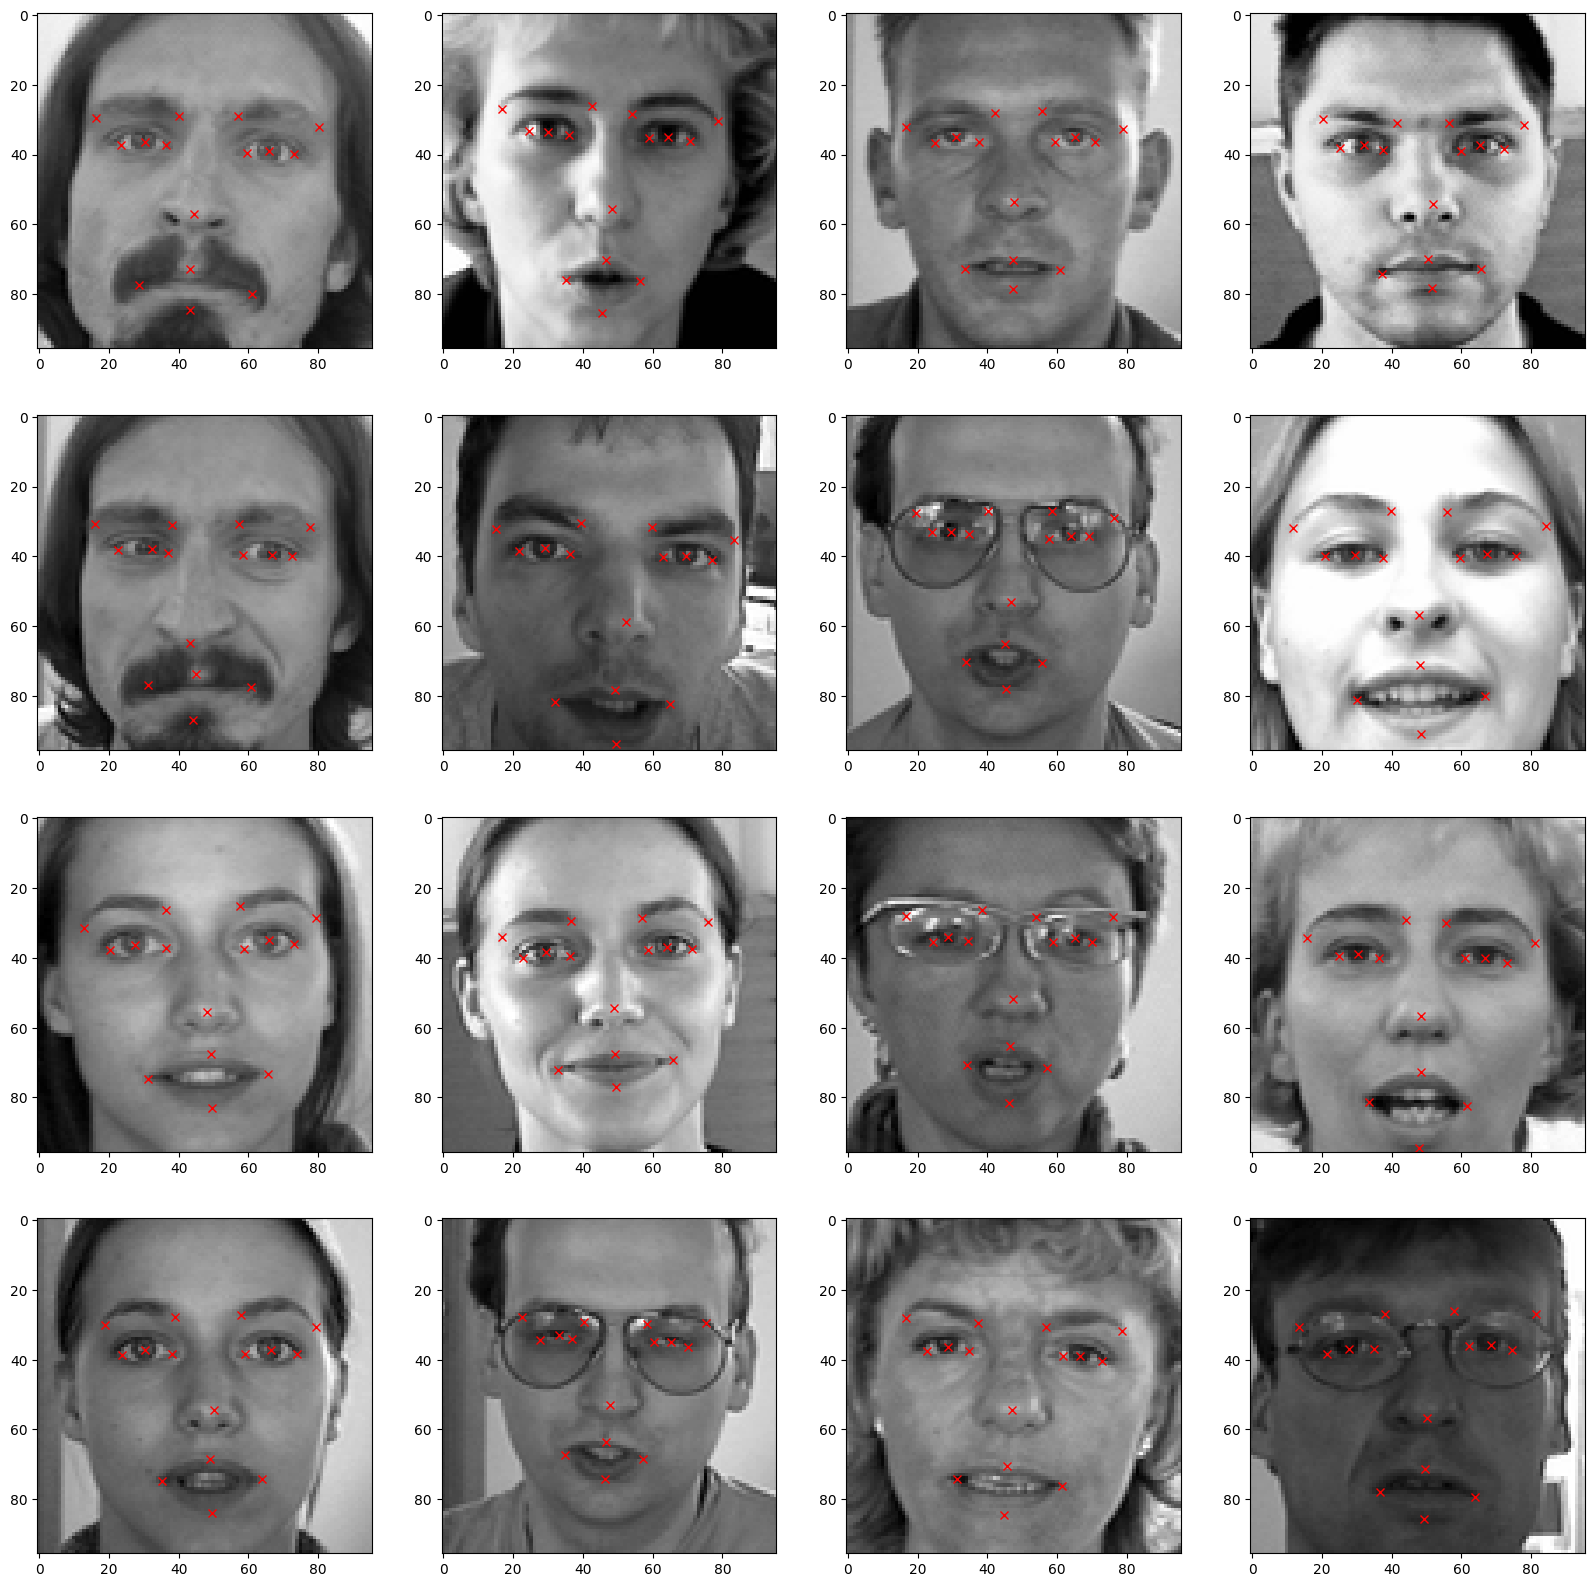

In [13]:
# Let's view more images in a grid format
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    image = plt.imshow(facialpoints_df['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'rx')


#Mini task 2: display 64 image with facials key points insteed of 16

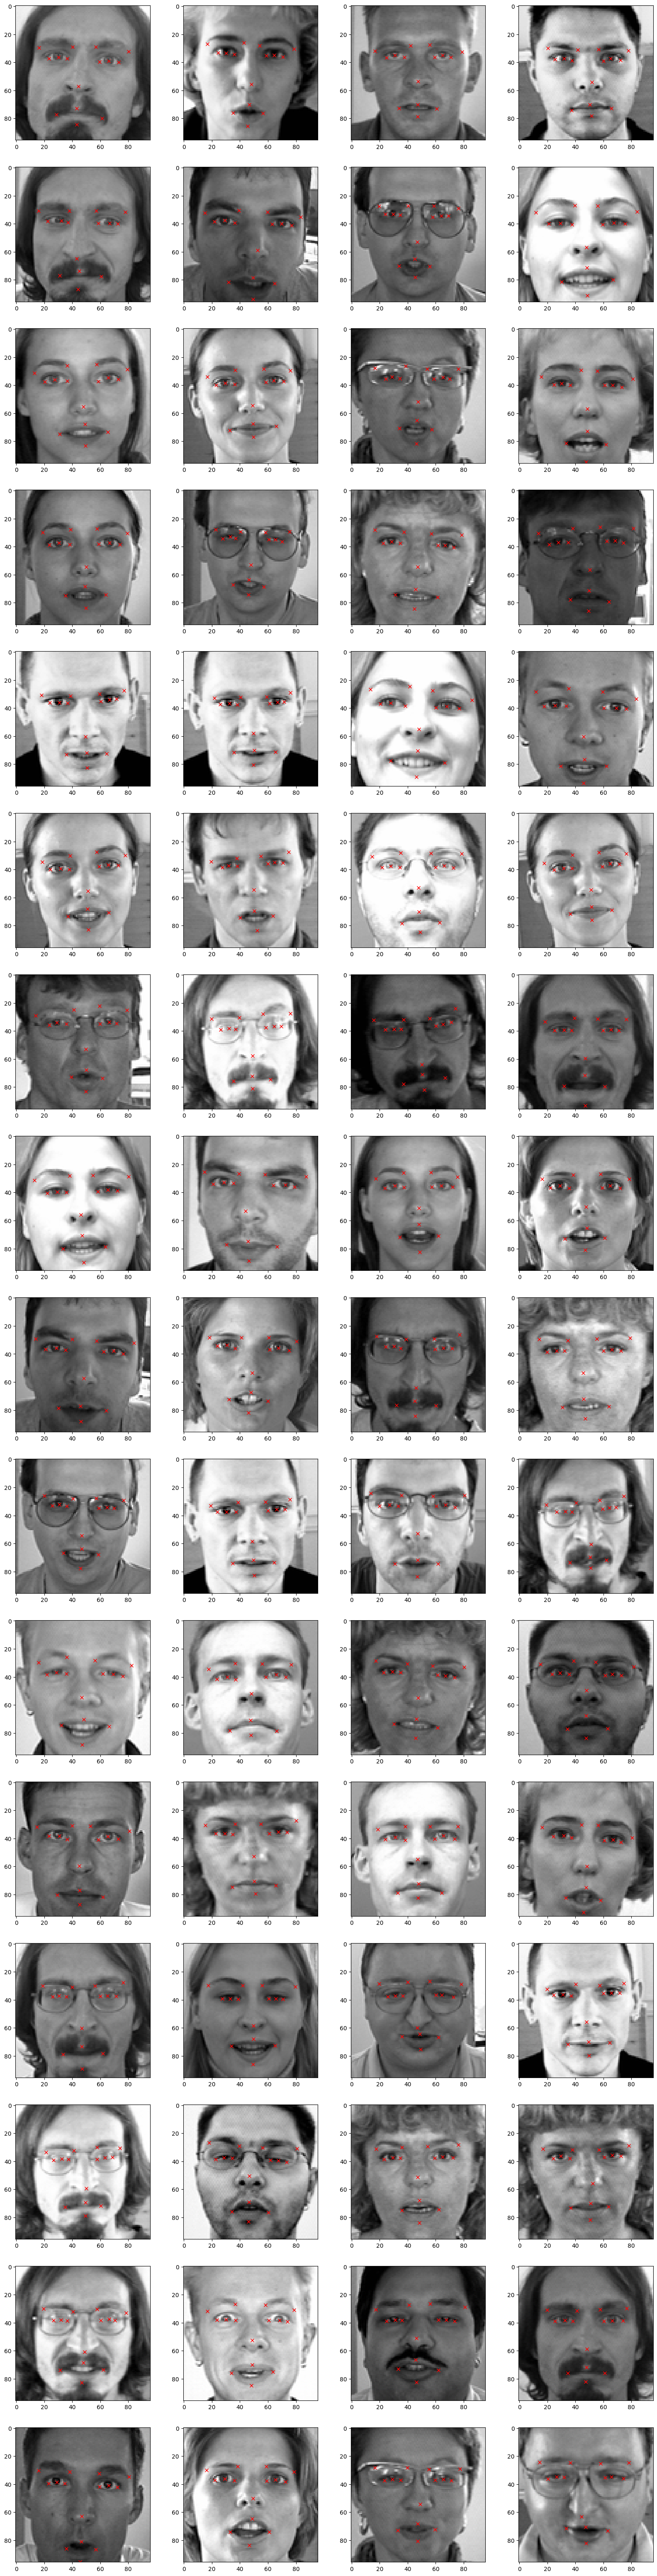

In [14]:
fig = plt.figure(figsize=(20, 80))

for i in range(64):
    ax = fig.add_subplot(16, 4, i + 1)
    image = plt.imshow(facialpoints_df['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'rx')

# TASK #4: PERFORM IMAGE AUGMENTATION

In [15]:
# Create a new copy of the dataframe
import copy
facialpoints_df_copy = copy.copy(facialpoints_df)

In [16]:
# obtain the header of the DataFrame (names of columns)

columns = facialpoints_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [17]:
# Take a look at the pixel values of a sample image and see if it makes sense!
facialpoints_df['Image'][0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

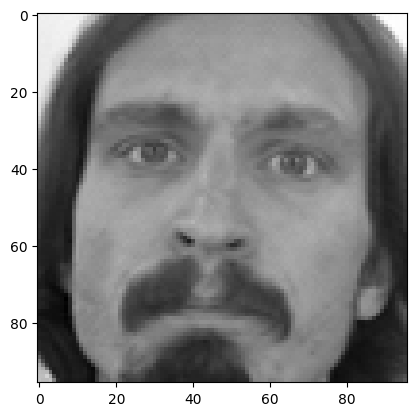

In [18]:
# plot the sample image
plt.imshow(facialpoints_df['Image'][0], cmap = 'gray')

In [19]:
# Now Let's flip the image column horizontally
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

In [20]:
# Now take a look at the flipped image and do a sanity check!
# Notice that the values of pixels are now flipped
facialpoints_df_copy['Image'][0]

array([[250, 250, 250, ..., 237, 236, 238],
       [251, 250, 249, ..., 236, 238, 235],
       [250, 251, 251, ..., 237, 236, 237],
       ...,
       [ 60,  57,  52, ..., 181, 183, 186],
       [ 78,  69,  61, ..., 207, 188, 189],
       [ 90,  75,  70, ..., 184, 184, 191]])

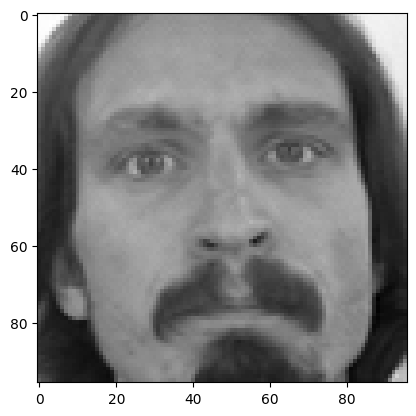

In [21]:
# Notice that the image is flipped now
plt.imshow(facialpoints_df_copy['Image'][0], cmap = 'gray')

In [22]:
# Since we are flipping the images horizontally, y coordinate values would be the same
# X coordinate values only would need to change, all we have to do is to subtract our initial x-coordinate values from width of the image(96)
for i in range(len(columns)):
  if i%2 == 0:
    facialpoints_df_copy[columns[i]] = facialpoints_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

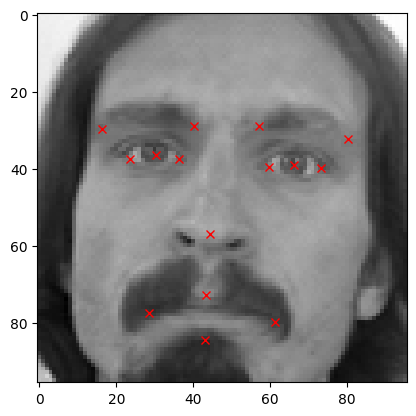

In [23]:
# View the Original image
plt.imshow(facialpoints_df['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(facialpoints_df.loc[0][j-1], facialpoints_df.loc[0][j], 'rx')

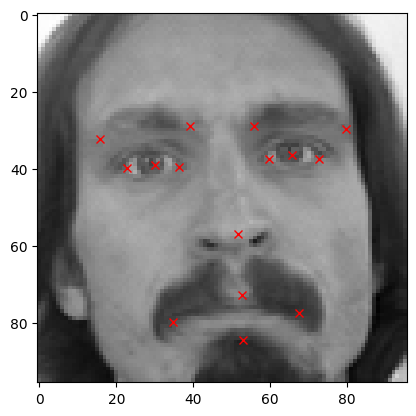

In [24]:
# View the Horizontally flipped image
plt.imshow(facialpoints_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx')

In [25]:
# Concatenate the original dataframe with the augmented dataframe
facialpoints_df_augmented = np.concatenate((facialpoints_df,facialpoints_df_copy))

In [26]:
facialpoints_df_augmented.shape

(4280, 31)

In [27]:
# Let's try to perform another image augmentation by randomly increasing images brightness
# We multiply pixel values by random values between 1 and 2 to increase the brightness of the image
# we clip the value between 0 and 255

import random

facialpoints_df_copy = copy.copy(facialpoints_df)
facialpoints_df_copy['Image'] = facialpoints_df['Image'].apply(lambda x:np.clip(random.uniform(1, 2) * x, 0.0, 255.0))
facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))
facialpoints_df_augmented.shape

(6420, 31)

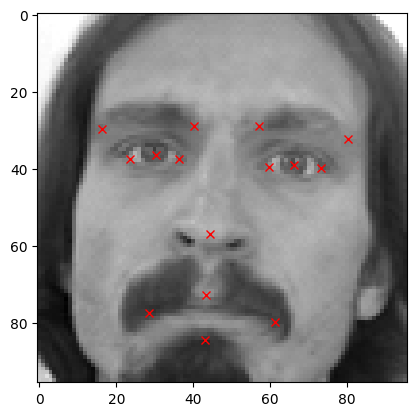

In [28]:
# Let's view image with increased brightness

plt.imshow(facialpoints_df_copy['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx')

MINI CHALLENGE:
- Perform image augmentation by decreasing image brightness
- Perform a sanity check and visualize sample images

In [29]:
# Randomly decrease image brightness
# Multiply pixel values by random values between 0 and 1 to decrease the brightness of the image
# Clip the value between 0 and 255

facialpoints_df_copy = copy.copy(facialpoints_df)
facialpoints_df_copy['Image'] = facialpoints_df['Image'].apply(lambda x:np.clip(random.uniform(0, 0.2) * x, 0.0, 255.0))
# facialpoints_df_augmented = np.concatenate((facialpoints_df_augmented, facialpoints_df_copy))
# facialpoints_df_augmented.shape

In [30]:
facialpoints_df['Image'][0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

In [31]:
facialpoints_df_copy['Image'][0]

array([[29.14146583, 28.89657956, 29.01902269, ..., 30.61078343,
        30.61078343, 30.61078343],
       [28.77413643, 29.14146583, 28.89657956, ..., 30.4883403 ,
        30.61078343, 30.73322657],
       [29.01902269, 28.89657956, 29.01902269, ..., 30.73322657,
        30.73322657, 30.61078343],
       ...,
       [22.77442287, 22.40709347, 22.1622072 , ...,  6.36704295,
         6.97925862,  7.34658802],
       [23.14175227, 23.01930914, 25.34572868, ...,  7.46903116,
         8.44857623,  9.55056443],
       [23.38663854, 22.52953661, 22.52953661, ...,  8.57101936,
         9.18323503, 11.01988204]])

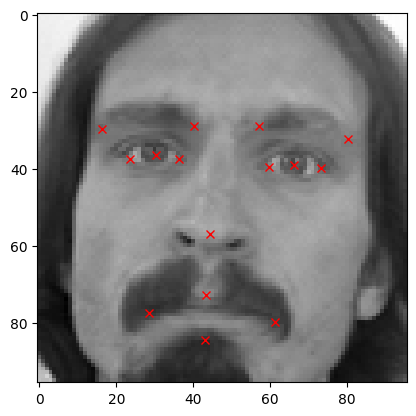

In [32]:
# Let's view a sample image with decreased brightness decreased image
plt.imshow(facialpoints_df_copy['Image'][0], cmap = 'gray')
for j in range(1,31,2):
        plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx')

MINI CHALLENGE:
- Augment images by flipping them vertically
(Hint: Flip along x-axis and note that if we are flipping along x-axis, x co-ordinates won't change)


In [33]:
facialpoints_df_copy = copy.copy(facialpoints_df)

In [34]:
# Flip the image column vertically (note that axis = 0)
facialpoints_df_copy['Image'] = facialpoints_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0))

In [35]:
facialpoints_df['Image'][0]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

In [36]:
facialpoints_df_copy['Image'][0]

array([[191, 184, 184, ...,  70,  75,  90],
       [189, 188, 207, ...,  61,  69,  78],
       [186, 183, 181, ...,  52,  57,  60],
       ...,
       [237, 236, 237, ..., 251, 251, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [238, 236, 237, ..., 250, 250, 250]])

In [37]:
# Since we are flipping the images vertically, x coordinate values would be the same
# y coordinate values only would need to change, all we have to do is to subtract our initial y-coordinate values from width of the image(96)
for i in range(len(columns)):
  if i%2 == 1:
    facialpoints_df_copy[columns[i]] = facialpoints_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

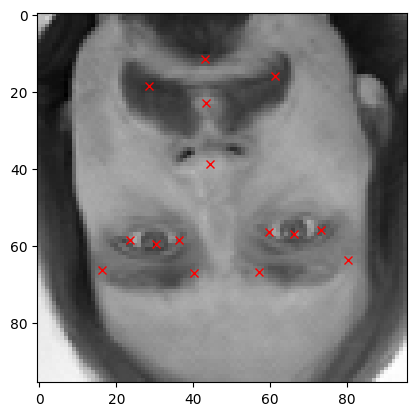

In [38]:
# View the Horizontally flipped image
plt.imshow(facialpoints_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx')

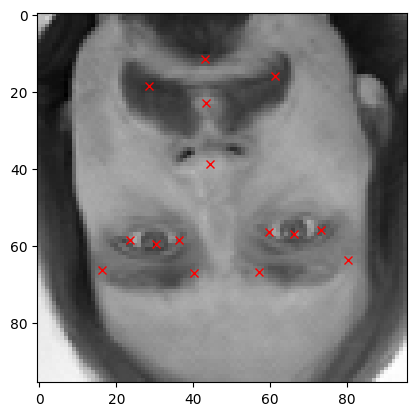

In [39]:
#Mini challenge 4
#View the Vertically flipped image
plt.imshow(facialpoints_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(facialpoints_df_copy.loc[0][j-1], facialpoints_df_copy.loc[0][j], 'rx')

# TASK #5: PERFORM NORMALIZATION AND TRAINING DATA PREPARATION

In [40]:
# Obtain the value of 'Images' and normalize it
# Note that 'Images' are in the 31st column but since indexing start from 0, we refer 31st column by 30
img = facialpoints_df_augmented[:, 30]
img = img/255.

# Create an empty array of shape (10700, 96, 96, 1) to train the model
X = np.empty((len(img), 96, 96, 1))

# Iterate through the normalized images list and add image values to the empty array
# Note that we need to expand it's dimension from (96,96) to (96,96,1)
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2)

# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [41]:
# Obtain the values of key face points coordinates, which are to used as target.
y = facialpoints_df_augmented[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [42]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

MINI CHALLENGE:
- Try a different value for 'test_size'
- Randomly visualize 64 images to make sure that data makes sense prior to training

In [43]:
X_train.shape

(5778, 96, 96, 1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape

(5136, 96, 96, 1)

In [45]:
import random
rd_ids = random.sample(range(len(X_train)), 64)
fig = plt.figure(figsize=(20, 80))

for id in rd_ids:
  X, y = X_train[id], y_train[id]
  print(f'===== Random Sample {id} ========')
  print(X, y)

===== Random Sample 2203 ========
[[[0.44313726]
  [0.4       ]
  [0.4509804 ]
  ...
  [0.34509805]
  [0.40392157]
  [0.4117647 ]]

 [[0.3882353 ]
  [0.44705883]
  [0.44313726]
  ...
  [0.34509805]
  [0.39215687]
  [0.3882353 ]]

 [[0.41568628]
  [0.4862745 ]
  [0.41568628]
  ...
  [0.3372549 ]
  [0.3647059 ]
  [0.36078432]]

 ...

 [[0.43137255]
  [0.40784314]
  [0.38039216]
  ...
  [0.5372549 ]
  [0.5058824 ]
  [0.49411765]]

 [[0.42352942]
  [0.34509805]
  [0.37254903]
  ...
  [0.53333336]
  [0.5176471 ]
  [0.50980395]]

 [[0.40392157]
  [0.3882353 ]
  [0.3882353 ]
  ...
  [0.48235294]
  [0.53333336]
  [0.5137255 ]]] [65.26625  38.92027  29.340004 37.994305 58.570496 41.331757 75.67157
 41.423218 37.557266 40.13845  22.683477 38.896687 53.463703 30.93376
 80.713005 32.19232  43.658638 30.641071 16.204454 30.93376  46.72635
 55.990807 61.25714  79.032295 28.866997 76.95224  45.64413  76.755
 45.23885  78.08664 ]
===== Random Sample 4204 ========
[[[0.37254903]
  [0.34509805]
  [0.337

<Figure size 2000x8000 with 0 Axes>

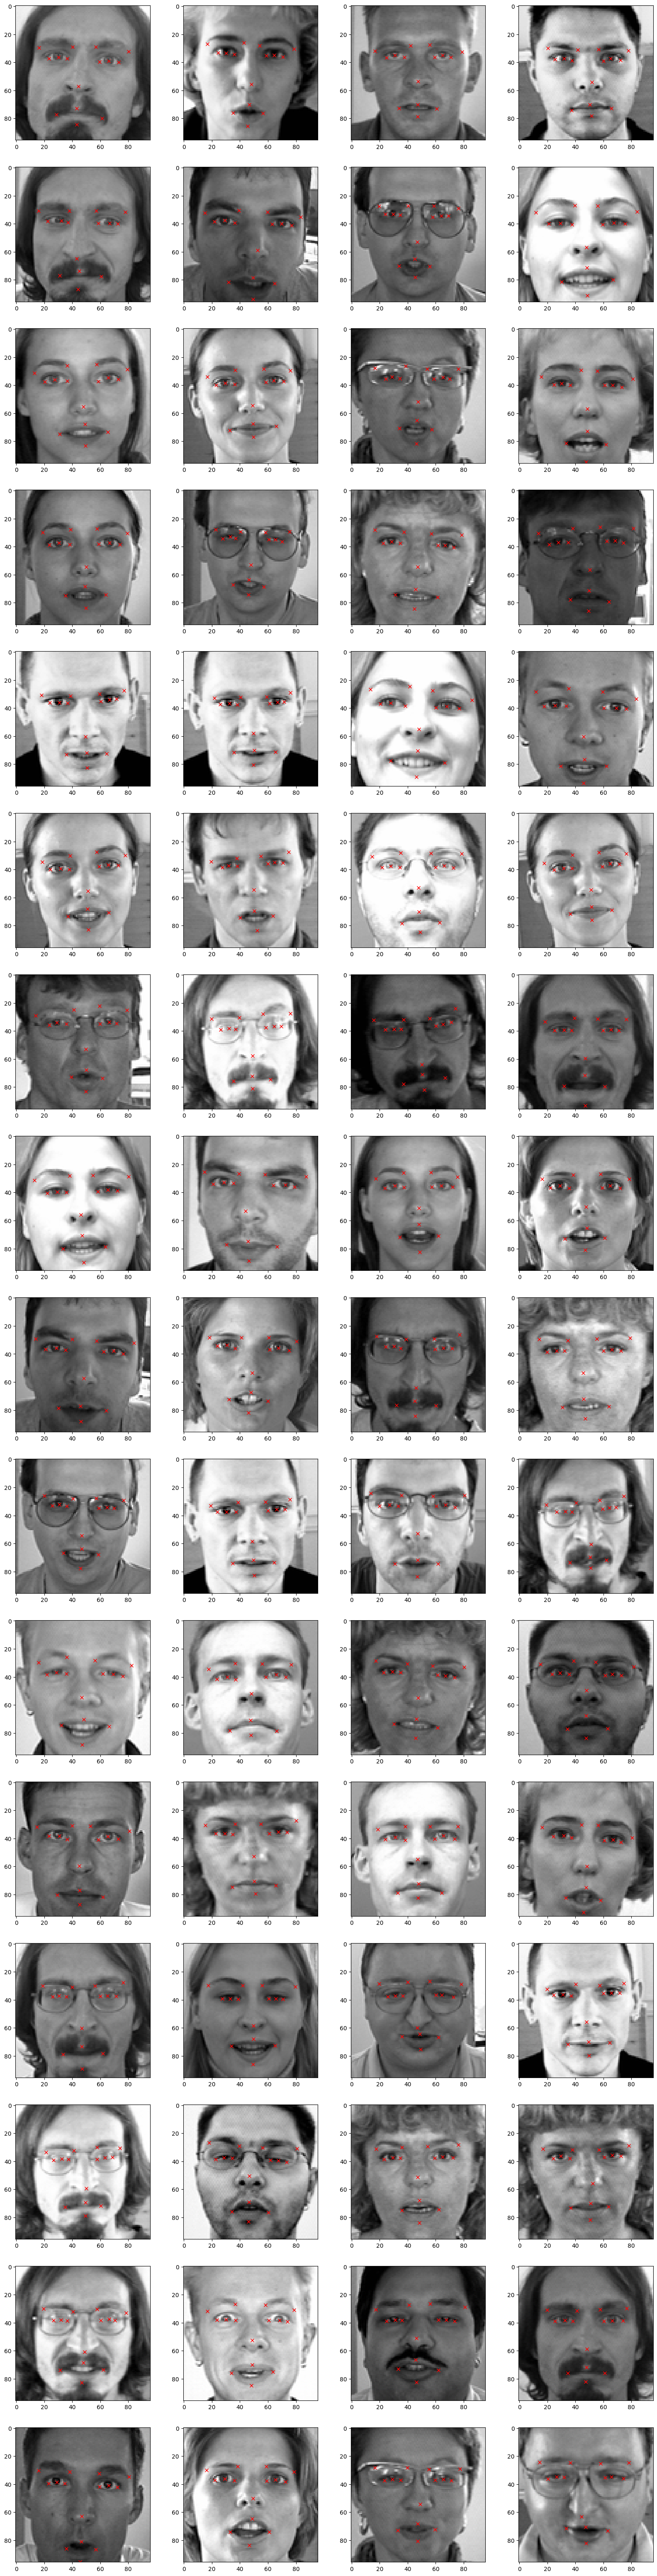

In [46]:
#visualize 64 images
fig = plt.figure(figsize=(20, 80))

for i in range(64):
    ax = fig.add_subplot(16, 4, i + 1)
    image = plt.imshow(facialpoints_df['Image'][i], cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(facialpoints_df.loc[i][j-1], facialpoints_df.loc[i][j], 'rx')

# TASK #6: UNDERSTAND THE THEORY AND INTUITION BEHIND DEEP NEURAL NETWORKS

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK #7: BUILD DEEP RESIDUAL NEURAL NETWORK MODEL

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [47]:
def res_block(X, filter, stage):

  # CONVOLUTIONAL BLOCK
  X_copy = X
  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1), strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Add data from main and short paths
  X = Add()([X,X_copy])
  X = Activation('relu')(X)



  # IDENTITY BLOCK 1
  X_copy = X

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)



  # IDENTITY BLOCK 2
  X_copy = X

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [48]:
input_shape = (96,96,1)

def build_model(input_shape=(96,96,1)):
    # Input tensor shape
    X_input = Input(input_shape)

    # Zero-padding
    X = ZeroPadding2D((3,3))(X_input)

    # Stage #1
    X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3,3), strides= (2,2))(X)

    # Stage #2
    X = res_block(X, filter= [64,64,256], stage= 2)

    # Stage #3
    X = res_block(X, filter= [128,128,512], stage= 3)

    # Average Pooling
    X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

    # Final layer
    X = Flatten()(X)
    X = Dense(4096, activation = 'relu')(X)
    X = Dropout(0.2)(X)
    X = Dense(2048, activation = 'relu')(X)
    X = Dropout(0.1)(X)
    X = Dense(30, activation = 'relu')(X)


    model = Model( inputs= X_input, outputs = X)
    return model

MINI CHALLENGE:
- Experiment with changing the network architecture by removing 2 MaxPooling layers from the Res Block and train the model
- Try to add 'X = res_block(X, filter= [256,256,1024], stage= 4)' Block after stage #3 block.
- What did you observe? Comment on your answer

In [49]:
def res_block_miniChallenge(X, filter, stage):

  # CONVOLUTIONAL BLOCK
  X_copy = X
  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1), strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  # X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  # X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Add data from main and short paths
  X = Add()([X,X_copy])
  X = Activation('relu')(X)



  # IDENTITY BLOCK 1
  X_copy = X

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)



  # IDENTITY BLOCK 2
  X_copy = X

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Add both paths together (Note that we feed the original input as is hence the name "identity")
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [50]:
def build_model_miniChallenge(input_shape=(96, 96, 1)):
    # Input tensor shape
    X_input = Input(input_shape)

    # Zero-padding
    X = ZeroPadding2D((3,3))(X_input)

    # Stage #1
    X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3,3), strides= (2,2))(X)

    # Stage #2
    X = res_block_miniChallenge(X, filter= [64,64,256], stage= 2)

    # Stage #3
    X = res_block_miniChallenge(X, filter= [128,128,512], stage= 3)

    # State #4
    X = res_block_miniChallenge(X, filter= [256,256,1024], stage= 4)

    # Average Pooling
    X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

    # Final layer
    X = Flatten()(X)
    X = Dense(4096, activation = 'relu')(X)
    X = Dropout(0.2)(X)
    X = Dense(2048, activation = 'relu')(X)
    X = Dropout(0.1)(X)
    X = Dense(30, activation = 'relu')(X)


    return Model( inputs= X_input, outputs = X)

custom_model = build_model_miniChallenge(input_shape)
custom_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 102, 102, 1)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']           

# Nhận xét kết quả thay đổi kiến trúc mô hình:

### Khi thực hiện thay đổi kiến trúc:

1. **Mô hình sau khi thay đổi:**
   - Tổng số tham số: 520,902,174 (1.94 GB)
   - Tham số có thể huấn luyện: 520,882,334 (1.94 GB)

2. **Mô hình gốc (không thay đổi kiến trúc):**
   - Tổng số tham số: 18,016,286 (68.73 MB)
   - Tham số có thể huấn luyện: 18,007,710 (68.69 MB)

### Nhận xét:

1. **Số lượng tham số tăng lên rất nhiều do việc bỏ đi 2 MaxPooling Layer:**
   - Mô hình sau khi thay đổi có tổng số tham số gấp khoảng 29 lần so với mô hình gốc.
   -> Gây ra vấn đề về tài nguyên tính toán và yêu cầu lớn về bộ nhớ khi huấn luyện và triển khai mô hình.
   -> Tăng lên gần 29 lần có thể gây ra overfitting vì độ chi tiết của feature map.
   - Việc bỏ đi 2 MaxPooling Layer làm tăng kích thước của feature map sau mỗi Res Block.
   - Tăng thời gian huấn do tăng kích thước của model.

3. **Ảnh hưởng của việc thêm một res_block:**
   - Thêm một res_block có thể làm tăng độ sâu của mạng, có thể giúp mô hình học được các đặc trưng phức tạp hơn.
   - Tuy nhiên, độ sâu càng lớn có thể không tốt, không mang lại sự cải thiện về hiệu suất vì có thể gây ra các vấn đề như vanishing/exploding gradients.

# TASK #8: COMPILE AND TRAIN DEEP LEARNING MODEL

In [51]:
model = build_model(input_shape)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d_1 (ZeroPadd  (None, 102, 102, 1)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d_1[0][0]']    
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']         

In [52]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mean_squared_error", optimizer = adam, metrics = ['accuracy'])

In [53]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "/content/drive/MyDrive/CS406/my_weights.hdf5", verbose = 1, save_best_only = True)

In [54]:
history = model.fit(X_train, y_train, batch_size = 256, epochs= 100, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 518.0204 - accuracy: 0.2246
Epoch 1: val_loss improved from inf to 2261.07837, saving model to /content/drive/MyDrive/CS406/my_weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 31s 420ms/step - loss: 518.0204 - accuracy: 0.2246 - val_loss: 2261.0784 - val_accuracy: 0.7160
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 165.8376 - accuracy: 0.5071
Epoch 2: val_loss improved from 2261.07837 to 1914.63367, saving model to /content/drive/MyDrive/CS406/my_weights.hdf5
20/20 [==============================] - 4s 198ms/step - loss: 165.8376 - accuracy: 0.5071 - val_loss: 1914.6337 - val_accuracy: 0.7160
Epoch 3/100
19/20 [===========================>..] - ETA: 0s - loss: 126.5771 - accuracy: 0.6221
Epoch 3: val_loss improved from 1914.63367 to 1615.59729, saving model to /content/drive/MyDrive/CS406/my_weights.hdf5
20/20 [==============================] - 3s 159ms/step - loss: 126.4243 - accuracy: 0.6221 - val_loss: 1615.5973 - val_accuracy: 0.7160
Epoch 4/100
19/20 [===========================>..] - ETA: 0s - loss: 93.2360 - accuracy: 0.6316
Epoch 4: val_loss improved from 1615.59729 to 1305.90247, savin

MINI CHALLENGE:
- Experiment with changing the batch size and validation split value
- Comment on your answer


In [55]:
model2 = build_model(input_shape)
adam2 = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model2.compile(loss="mean_squared_error", optimizer = adam2, metrics = ['accuracy'])
checkpointer2 = ModelCheckpoint(filepath = "my_weights_2.hdf5", verbose = 1, save_best_only = True)
history2 = model2.fit(X_train, y_train, batch_size = 512, epochs= 100, validation_split = 0.2, callbacks=[checkpointer2])

Epoch 1/100
9/9 [==============================] - ETA: 0s - loss: 1006.0246 - accuracy: 0.0677
Epoch 1: val_loss improved from inf to 2439.41455, saving model to my_weights_2.hdf5
9/9 [==============================] - 23s 487ms/step - loss: 1006.0246 - accuracy: 0.0677 - val_loss: 2439.4146 - val_accuracy: 0.0000e+00
Epoch 2/100
8/9 [=========================>....] - ETA: 0s - loss: 281.9041 - accuracy: 0.5012
Epoch 2: val_loss improved from 2439.41455 to 2326.13330, saving model to my_weights_2.hdf5
9/9 [==============================] - 5s 597ms/step - loss: 281.8214 - accuracy: 0.5015 - val_loss: 2326.1333 - val_accuracy: 0.6955
Epoch 3/100
8/9 [=========================>....] - ETA: 0s - loss: 190.7498 - accuracy: 0.6133
Epoch 3: val_loss improved from 2326.13330 to 2196.81641, saving model to my_weights_2.hdf5
9/9 [==============================] - 3s 314ms/step - loss: 190.8780 - accuracy: 0.6122 - val_loss: 2196.8164 - val_accuracy: 0.6955
Epoch 4/100
8/9 [====================

# Nhận xét

**Kết quả của giữ nguyên Bacth Size và Validation Split:**
  - loss: 6.1695 - accuracy: 0.7360 - val_loss: 57.0138 - val_accuracy: 0.6732
**Kết quả của tăng Bacth Size và Validation Split:**
  - loss: 17.7905 - accuracy: 0.6770 - val_loss: 93.8722 - val_accuracy: 0.6975

**=> Loss tăng gần gấp 3 lần, Accuracy giảm từ 73% về 67%; Val Accuracy tăng từ 67% lên 69%. Có thể lý giải do 1 vài lý do sau đây:**

1. **Batch Size Lớn Hơn (từ 256 lên 512):**
   - **Ưu điểm:**
     - Rút gọn thời gian huấn luyện, Tăng tốc quá trình huấn luyện vì nhiều dữ liệu được xử lý cùng một lúc.
     - Giảm độ loss nhanh hơn trong training vì gradient được tính dựa trên một lượng lớn mẫu.
   - **Nhược điểm:**
     - Yêu cầu tài nguyên nhiều hơn, GPU xịn hơn.
     - Không thích hợp cho các mô hình hoặc tập dữ liệu nhỏ vì có thể dẫn đến overfitting.

2. **Validation Split Lớn Hơn (từ 0.05 lên 0.2):**
   - **Ưu điểm:**
     - Giúp đánh giá độ chính xác của mô hình với một tập kiểm thử lớn hơn và kiểm soát được overfitting.
     - Có thể tăng Val Acc vì mô hình phải đánh giá độ chính xác chi tiết hơn trên tập kiểm thử.
   - **Nhược điểm:**
     - Làm mất đi một số độ đa dạng của bộ dữ liệu trong quá trình huấn luyện.
     - Tăng thời gian huấn luyện vì phải đánh giá mô hình trên một tập kiểm thử lớn hơn.


In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt

result = model2.evaluate(X_test,y_test)
print("Accuracy : {}".format(result[1]))

df_predict_2 = model2.predict(X_test)
rms_2 = sqrt(mean_squared_error(y_test, df_predict_2))
print("RMSE value : {}".format(rms_2))

41/41 [==============================] - 1s 8ms/step - loss: 105.0930 - accuracy: 0.6783
Accuracy : 0.6783488988876343
41/41 [==============================] - 1s 6ms/step
RMSE value : 10.251487065813762


# TASK #9: ASSESS TRAINED MODEL PERFORMANCE

In [57]:
# Evaluate trained model

result = model.evaluate(X_test,y_test)
print("Accuracy : {}".format(result[1]))

41/41 [==============================] - 0s 10ms/step - loss: 51.7552 - accuracy: 0.6861
Accuracy : 0.6861370801925659


In [58]:
# Getting the model history keys
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

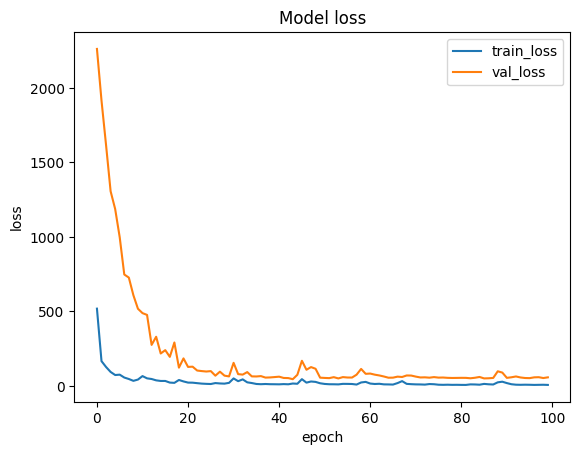

In [59]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [60]:
# Make prediction using the testing dataset
df_predict = model.predict(X_test)

41/41 [==============================] - 1s 8ms/step


In [61]:
# Print the rmse loss values

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, df_predict))
print("RMSE value : {}".format(rms))

RMSE value : 7.194109456803173


In [62]:
# Convert the predicted values into a dataframe

df_predict= pd.DataFrame(df_predict, columns = columns)
df_predict.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          64.316818          30.746796           27.296778   
1          63.884010          35.362885           30.749266   
2          64.891388          37.465530           28.010798   
3          64.089027          34.142303           30.512583   
4          30.322083          34.439304           64.193260   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           32.488178                56.668533                32.103783   
1           34.567326                58.090755                35.833965   
2           36.408722                57.398598                38.020664   
3           31.743696                58.209694                34.510853   
4           37.472797                35.963066                35.415073   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                72.197525                31.110760                 35.298191   
1                69.602585                36.106583                 36.321827   
2                72.149406                38.419327                 35.235859   
3                70.276085                35.626568                 36.774506   
4                23.864264                34.712391                 58.145756   

   right_eye_inner_corner_y  ...  nose_tip_x  nose_tip_y  mouth_left_corner_x  \
0                 33.275490  ...   47.126076   50.392773            63.887882   
1                 35.554691  ...   44.646336   54.894020            59.608116   
2                 37.425179  ...   44.483719   55.741676            61.423203   
3                 33.230629  ...   45.677605   52.418560            58.030361   
4                 37.478687  ...   45.006481   50.445629            28.116915   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            66.041100             30.849581             67.704750   
1            68.278915             34.059208             67.405930   
2            74.209297             29.883568             73.639091   
3            67.842941             31.210232             65.656357   
4            66.614365             58.272278             69.408699   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               47.254444               65.023087                  47.469231   
1               45.887245               65.363823                  45.742416   
2               44.911556               71.118134                  45.008171   
3               44.235512               64.350105                  43.845943   
4               43.421356               63.861816                  42.752903   

   mouth_center_bottom_lip_y  
0                  73.039841  
1                  74.877678  
2                  80.684570  
3                  73.753151  
4                  74.772461  

[5 rows x 30 columns]

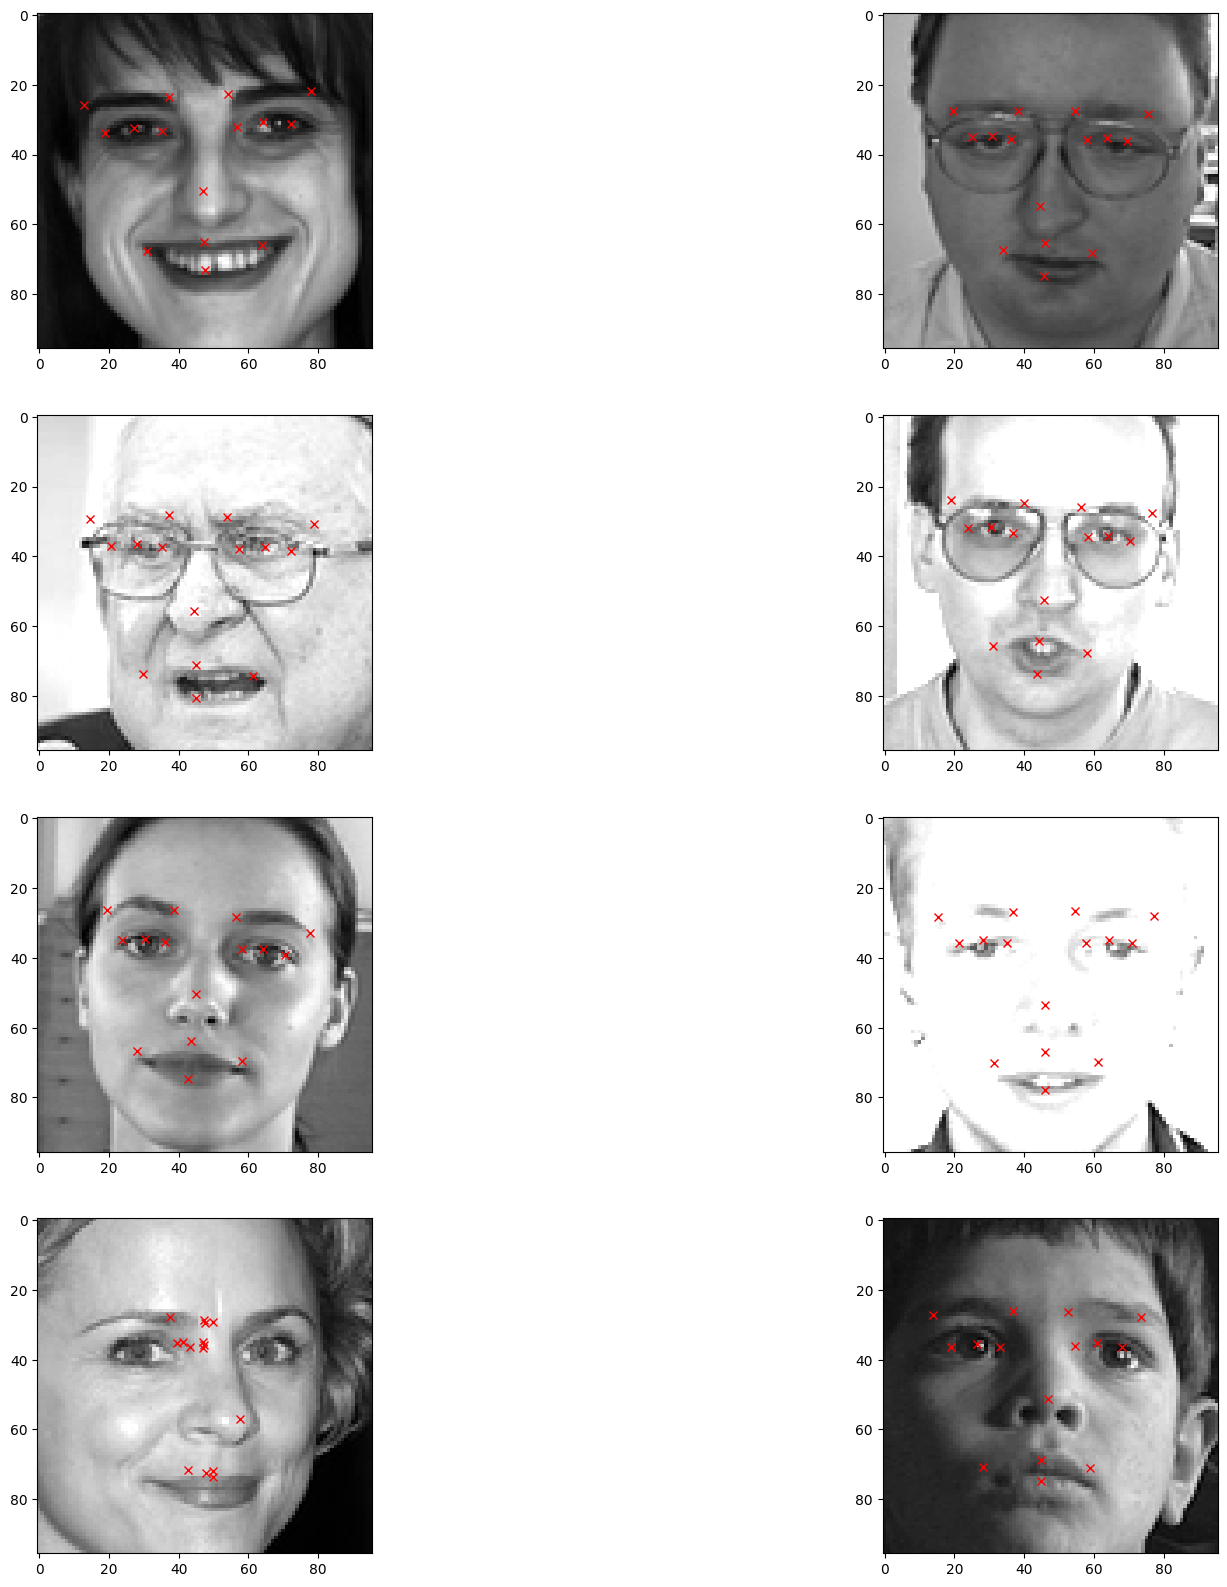

In [63]:
# Plot the test images and their predicted keypoints

fig = plt.figure(figsize=(20, 20))

for i in range(8):
    ax = fig.add_subplot(4, 2, i + 1)
    # Using squeeze to convert the image shape from (96,96,1) to (96,96)
    plt.imshow(X_test[i].squeeze(),cmap='gray')
    for j in range(1,31,2):
            plt.plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')

# CONGRATULATIONS ON FINISHING THE PROJECT

MINI CHALLENGE SOLUTIONS